In [106]:
# Read data files from OOS (Oliver Observing Station) weather station and generate time series.

import pandas as pd
#import plotly as plt

datafile = 'data/oosdata.2020'
dat_names = ['wdate','wind_dir','wind_speed','wind_gust','col5','humidity','col7','temp_out','col9','col10']
df = pd.read_csv(datafile, sep=' ',names=dat_names,index_col=0,parse_dates=True)

In [107]:
df.dtypes
df.index
print(df.dtypes)
df.index = pd.to_datetime(df.index,format="%Y%m%d%H%M")
df.tail()



wind_dir      float64
wind_speed    float64
wind_gust     float64
col5          float64
humidity      float64
col7          float64
temp_out      float64
col9          float64
col10         float64
dtype: object


wind_dir  wind_speed  wind_gust   col5  humidity  col7  \
wdate                                                                         
2020-02-06 12:51:00      16.0         0.0        0.0  100.0      52.0  65.6   
2020-02-06 12:51:00      16.0         0.0        0.0  100.0      52.0  65.6   
2020-02-06 13:00:00     359.0         0.0        0.0  100.0      53.0  65.8   
2020-02-06 13:05:00      19.0         1.0        3.0  100.0      52.0  65.9   
2020-02-06 13:10:00     293.0         0.0        6.0  100.0      52.0  66.1   

                     temp_out    col9  col10  
wdate                                         
2020-02-06 12:51:00      52.8  25.078   7.91  
2020-02-06 12:51:00      52.8  25.078   7.91  
2020-02-06 13:00:00      53.2  25.074   7.91  
2020-02-06 13:05:00      53.6  25.073   7.91  
2020-02-06 13:10:00      53.7  25.071   7.91

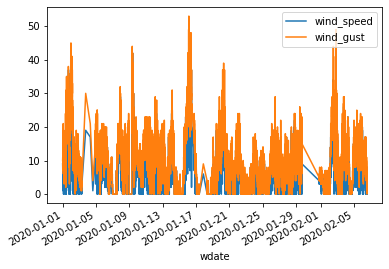

In [108]:
# Now plot wind_speed - Pandas plots are done with matplotlib
df.plot(y=['wind_speed','wind_gust'])



In [109]:
# Select wind direction and speed for a time interval.
# Show as polar plot.
winds = df.loc[dat['wind_dir'] != 359.0][['wind_dir','wind_speed']]
winds.head(10)

wind_dir  wind_speed
wdate                                    
2020-01-01 00:51:00      14.0         7.0
2020-01-01 01:06:00       8.0         5.0
2020-01-01 01:11:00     347.0         1.0
2020-01-01 01:26:00     344.0         9.0
2020-01-01 01:31:00     340.0         8.0
2020-01-01 01:41:00     297.0         3.0
2020-01-01 01:51:00     328.0         2.0
2020-01-01 02:11:00     335.0         3.0
2020-01-01 02:16:00     339.0         4.0
2020-01-01 02:31:00      12.0         0.0

Let's switch to plotly, it's much more useful.

In [110]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index,y=df['wind_speed'],line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=df.index,y=df['wind_gust'],line_color='darkred'))
fig.update_layout(title_text="Winds at OOS",xaxis_rangeslider_visible=True)
fig.show()


The date slider in plot above is esay to use, but perhaps we should have more sensible control over the time axis.
How about buttons that select a time period: one hour, 4 hours, 12 hours, 24 hours, 1 week, 1 month?

In [111]:
fig_ts = go.Figure()
fig_ts.add_trace(go.Scatter(x=df.index,y=df['wind_speed'],line_color='deepskyblue'))
fig_ts.add_trace(go.Scatter(x=df.index,y=df['wind_gust'],line_color='darkred'))

time_buttons = list([dict(count=1,label="1h",step="hour",stepmode="backward"),
                    dict(count=4,label="4h",step="hour",stepmode="backward"),
                    dict(count=12,label="12h",step="hour",stepmode="backward"),
                    dict(count=24,label="24h",step="hour",stepmode="backward"),
                    dict(count=7,label="1week",step="day",stepmode="backward"),
                    dict(step="all")])
fig_ts.update_layout(xaxis=dict(rangeselector=dict(buttons=time_buttons),rangeslider=dict(visible=True),type="date"))
fig_ts.show()

Next is a polar plot of winds over a small time interval.
I'd like to use a plotly slider to select the date-time range.
Here's an article that gives me some clues about applying a slider to a polar plot:
https://plot.ly/python/slider-widget/
And here is documentation for polar plots: https://plot.ly/python/polar-chart/
Use plotly FigureWidget?

In [112]:
import plotly.express as px
fig = px.scatter_polar(winds.head(100),r='wind_speed',theta='wind_dir')
fig.show()



In [113]:
# We need a figure with a fixed X-axis in order to use FigureWidget
fig1 = go.Figure()
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=df.index,y=df['wind_speed'],line_color='deepskyblue'))
fig1.add_trace(go.Scatter(x=df.index,y=df['wind_gust'],line_color='darkred'))
fig1.show()

In [114]:
from ipywidgets import interactive, HBox, VBox, widgets, interact
# find the range of the slider.
print(fig1['layout']['xaxis'])
#xmin, xmax = fig1['layout']['xaxis']['range']
xmin = min(df.index)
xmax = max(df.index)
print("Date Range: ",xmin,xmax)

# create FigureWidget from fig
f = go.FigureWidget(data=fig1.data, layout=fig1.layout)

slider = widgets.RangeSlider(
    min=xmin,
    max=xmax,
    step=1,
    readout=False,
    description='Date')
slider.layout.width = '800px'


# our function that will modify the xaxis range
def update_range(y):
    f.layout.xaxis.range = [y[0], y[1]]


# display the FigureWidget and slider with center justification
vb = VBox((f, interactive(update_range, y=slider)))
vb.layout.align_items = 'center'
vb

layout.XAxis()
Date Range:  2020-01-01 00:01:00 2020-02-06 13:10:00


AttributeError: module 'ipywidgets.widgets' has no attribute 'RangeSlider'